## Homework 2 - Computational Chemistry
#### Cody R. Drisko

In [1]:
## Packages ##
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.linalg as la
import sympy


## Conversions ##
bohr_to_m = 5.29177e-11
AU_mass_to_kg = 9.10938e-31
AU_angMom_to_Js = 1.054572e-34
J_to_kJmol = 6.022e23 / 1000
eV_to_J = 1 / 6.24e18
hartree_to_eV = 27.2114


## Functions ##
def E_n (n, h_bar, m_e, L):
    return (n**2 * np.pi**2 * h_bar**2) / (2 * m_e * L**2)

def psi_n(n, N, x):
    return N * np.cos(np.pi * x / 2)

def phi_n(n, N, x):
    return N * (1 - x**2)

def percent_difference(value1, value2):
    return (np.abs(value1 - value2) / np.abs((value1 + value2) / 2)) * 100

def xNormalize(x, f):
    return sympy.sqrt(1 / sympy.integrate(f**2, (x, -1, 1)))

def rNormalize(r, f):
    return sympy.sqrt(1 / sympy.integrate(f**2 * r**2, (r, 0, sympy.oo)))

def Hamiltonian_operator(r, waveFunction):
    return -1/2 * sympy.diff(waveFunction, r, r) - 1/r * waveFunction

def getH(r, func1, func2):
    function = func1 * r * Hamiltonian_operator(r, func2 * r)
    return sympy.integrate(function, (r, 0, sympy.oo))

def getS(r, func1, func2):
    function =  func1 * r * func2 * r
    return sympy.integrate(function, (r, 0, sympy.oo))

def linearCombination(r, c1, c2, xi2):
    gofr1 = sympy.exp(- r**2)
    gofr2 = sympy.exp(- xi2 * r**2)
    gofr1 *= rNormalize(r, gofr1)
    gofr2 *= rNormalize(r, gofr2)
    fofr = c1 * gofr1 + c2 * gofr2 
    fofr *= rNormalize(r, fofr)
    function = sympy.lambdify(r, fofr * r * Hamiltonian_operator(r, fofr * r))
    return quad(function, 0, np.inf)

___
### Question 1a

In [2]:
energy_Hartree = E_n(1, 1, 1, 2)
energy_kJmol = E_n(1, (1*AU_angMom_to_Js), (1*AU_mass_to_kg), (2*bohr_to_m)) * J_to_kJmol
energy_eV = E_n(1, (1*AU_angMom_to_Js/eV_to_J), (1*AU_mass_to_kg), (2*bohr_to_m)) * eV_to_J       


## Results ##
print("1a) E_1 = %0.3f Hartrees\n\
    E_1 = %0.3f kJ/mol\n\
    E_1 = %0.3f eV" %(energy_Hartree, energy_kJmol, energy_eV))

1a) E_1 = 1.234 Hartrees
    E_1 = 3239.010 kJ/mol
    E_1 = 33.563 eV


___
### Question 1b

1b) psi(-1) = 0
    psi(1) = 0
    The number of nodes = 0
    The normalization constant = 1


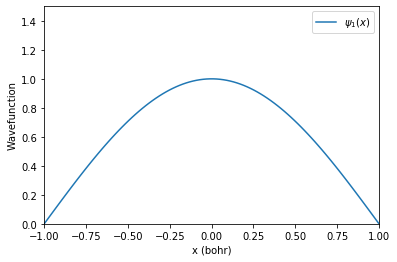

In [3]:
## Use SymPy to Get Normalization Constant ##
x = sympy.Symbol("x")
psi_1 = sympy.cos(sympy.pi * x / 2)
N_1b = xNormalize(x, psi_1)


## Set Psi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, N_1b, x[i])

    
## Get Nodes ##    
nodes=0
for i in range(1, 99):       ## Don't include first and last points
    if (psi_1[i] == 0):
        ++nodes

        
## Get Proper Boundary Conditions ##
boundCond1 = psi_1[0]
boundCond2 = psi_1[99]


## Results ##
print("1b) psi(-1) = %d\n\
    psi(1) = %d\n\
    The number of nodes = %d\n\
    The normalization constant = %d" %(boundCond1, boundCond2, nodes, N_1b))


## Plotting ##
plt.plot(x, psi_1, label=("$\\psi_1(x)$"))

plt.xlim(-1, 1)
plt.ylim(0, 1.5)
plt.xlabel("x (bohr)")
plt.ylabel("Wavefunction")
_ = plt.legend()

___
### Question 1c

1c) <E_1> = 1.25 Hartree

    The percent difference between the expectation value of the energy and
    the actual energy is 1.31%. This is small, telling us this function is
    a decent approximation to the actual wavefunction. The actual value is
    lowerthan the approximation, which is predicted by the variational
    principle.


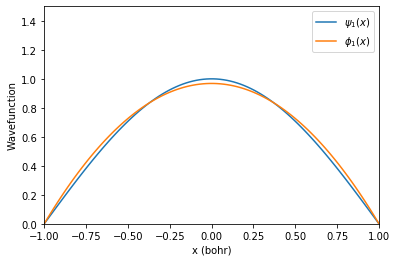

In [4]:
## Use SymPy to get Normalization Constant ##
x = sympy.Symbol("x")
exprPhi = (1 - x**2)
N_1c = xNormalize(x, exprPhi)

    
## Expectation Value ##
braPhi = N_1c * exprPhi                                      ## <phi_1|
Ham_ketPhi = (-1/2) * sympy.diff(braPhi, x, x)               ## H|phi_1>
energy_Expect = sympy.integrate(braPhi * Ham_ketPhi, (x, -1, 1))


## Results ##
print("1c) <E_1> = %0.2f Hartree\n\n\
    The percent difference between the expectation value of the energy and\n\
    the actual energy is %0.2f%%. This is small, telling us this function is\n\
    a decent approximation to the actual wavefunction. The actual value is\n\
    lowerthan the approximation, which is predicted by the variational\n\
    principle." %(energy_Expect, percent_difference(energy_Expect, energy_Hartree)))
    
    
## Comparison Between Psi_1 and Phi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)
phi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, N_1b, x[i])
    phi_1[i] = phi_n(1, N_1c, x[i])

    
## Plotting ##    
plt.plot(x, psi_1, label="$\\psi_1(x)$")
plt.plot(x, phi_1, label="$\\phi_1(x)$")

plt.xlim(-1, 1)
plt.ylim(0, 1.5)
plt.xlabel("x (bohr)")
plt.ylabel("Wavefunction")
_ = plt.legend()

___
### Question 2a

In [5]:
## Use SymPy to get Normalization Constant ##
r = sympy.Symbol("r")
gofr = sympy.exp(-r**2)
N_2a = rNormalize(r, gofr)


## Results ##
energy, error = linearCombination(r, 0, 1, 1)
print("2a) <E> = %0.3f Hartrees" %energy)

2a) <E> = -0.096 Hartrees


___
### Question 2b

2b) The optimal value of <E> occurrs at a value of 0.28 for xi
    which gives an energy of -0.42 Hartrees. Comparing this to the
    actual energy of -0.50 Hartrees, we see that the percent difference
    between the two values is 16.36% which seems large but considering
    it is just a single function, it actually does pretty well.


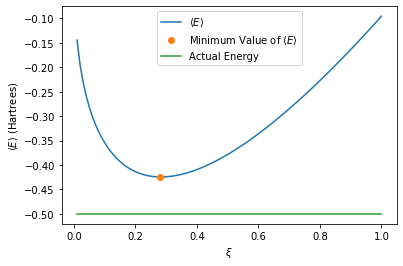

In [6]:
r = sympy.Symbol("r")
xi = np.linspace(0.01, 1, 100)
energy = np.zeros(100)
error = np.zeros(100)

for i in range(0, 100):
    energy[i], error[i] = linearCombination(r, 0, 1, xi[i])

bestEnergy = np.min(energy)
for i in range(0, 100):
    if energy[i] == bestEnergy:
        bestXi = xi[i]


## Results ##
print("2b) The optimal value of <E> occurrs at a value of %0.2f for xi\n\
    which gives an energy of %0.2f Hartrees. Comparing this to the\n\
    actual energy of -0.50 Hartrees, we see that the percent difference\n\
    between the two values is %0.2f%% which seems large but considering\n\
    it is just a single function, it actually does pretty well." 
    %(bestXi, bestEnergy, percent_difference(bestEnergy, -0.5) ))


## Plotting ##
plt.plot(xi, energy, label="$\\langle E \\rangle$")
plt.plot(bestXi, bestEnergy, 'o', label="Minimum Value of $\\langle E \\rangle$")
plt.plot(xi, np.linspace(-.5, -.5, 100), label="Actual Energy")

plt.xlabel("$\\xi$")
plt.ylabel("$\\langle E \\rangle$ (Hartrees)")
_ = plt.legend()

___
### Question 2c

In [7]:
r = sympy.Symbol("r")

xi1 = np.linspace(1e-9, 1, 100, endpoint=True)
E_1 = np.zeros(100)
c1_c2 = np.zeros(100)


for i in range(0, 100):
    gofr1 = sympy.exp(- xi1[i] * r**2)
    gofr2 = sympy.exp(- 1.5 * r**2)
    gofr1 *= rNormalize(r, gofr1)
    gofr2 *= rNormalize(r, gofr2)

    H_11 = getH(r, gofr1, gofr1)    # <g1|H|g1>
    H_12 = getH(r, gofr1, gofr2)    # <g1|H|g2> = <g2|H|g1>
    H_22 = getH(r, gofr2, gofr2)    # <g2|H|g2>
    S_11 = getS(r, gofr1, gofr1)    # <g1|g1>
    S_12 = getS(r, gofr1, gofr2)    # <g1|g2> = <g2|g1>
    S_22 = getS(r, gofr2, gofr2)    # <g2|g2>

    E = sympy.Symbol("E")
    secularEqn = (1 - S_12**2) * E**2 + (2*S_12*H_12 - H_11 - H_22)*E + H_11*H_22 - H_12**2
    E_1[i] = sympy.solve(secularEqn, E)[0]

    c1_c2[i] = - (H_12 - S_12*E_1[i]) / (H_11 - E_1[i])      

    
bestEnergy = np.min(E_1)
for i in range(0, 100):
    if E_1[i] == bestEnergy:
        bestXi1 = xi1[i]
        bestC1_C2 = c1_c2[i]
    if xi1[i] == 1:
        problemEnergy = E_1[i]
        problemC1_C2 = c1_c2[i]


## Results ##
print("2c) Problem Values: f(r) = c_1 N_1 exp(-r^2) + c_2 N_2 exp(-1.5r^2)\n\
      E_1 = %0.3f Hartrees\n\
      c1/c2 = %0.3f\n\n\
    Optimal Values: f(r) = c_1 N_1 exp(-%0.3fr^2) + c_2 N_2 exp(-1.5r^2)\n\
      E_1 = %0.3f Hartrees\n\
      c1/c2 = %0.3f\n\n\
    Checking work: (see notes)\n\
      <b(r)|H|b(r)> = %0.3f Hartrees\n\
      <c(r)|H|c(r)> = %0.3f Hartrees" %(problemEnergy, problemC1_C2, bestXi1, bestEnergy, bestC1_C2, linearCombination(r, 1, 1, 0.5)[0], linearCombination(r, 1, 1.5, 0.5)[0]))        

2c) Problem Values: f(r) = c_1 N_1 exp(-r^2) + c_2 N_2 exp(-1.5r^2)
      E_1 = -0.159 Hartrees
      c1/c2 = -2.679

    Optimal Values: f(r) = c_1 N_1 exp(-0.212r^2) + c_2 N_2 exp(-1.5r^2)
      E_1 = -0.486 Hartrees
      c1/c2 = 3.370

    Checking work: (see notes)
      <b(r)|H|b(r)> = -0.306 Hartrees
      <c(r)|H|c(r)> = -0.333 Hartrees


___
### Question 3a

In [8]:
file = open("FDA/Ar.out", 'r')

totalEnergyLine = []
_1sLine = []
_2sLine = []
_2pLine = []
_3sLine = []
_3pLine = []
count = 0

while True:
    line = file.readline()
    if not line: break
    if "itr" in line:
        count += 1
    if "total energy" in line:
        totalEnergyLine = line.split()
    if "1s" in line:
        _1sLine = line.split()
    if "2s" in line:
        _2sLine = line.split()
    if "2p" in line:
        _2pLine = line.split()
    if "3s" in line:
        _3sLine = line.split()
    if "3p" in line:
        _3pLine = line.split()
file.close()


## Results ##
print("3a) Argon:\n\
    Number of SCF Iterations = %d\n\
    Final HFS Energy = %s Hartrees\n\n\
    Orbital | Energy (Hartrees)\n\
    --------+------------------\n\
       1s   |    %s \n\
       2s   |    %s \n\
       2p   |    %s \n\
       3s   |    %s \n\
       3p   |    %s" %(count, totalEnergyLine[3], _1sLine[2], _2sLine[2], _2pLine[2], _3sLine[2], _3pLine[2]))


3a) Argon:
    Number of SCF Iterations = 30
    Final HFS Energy = -526.8275 Hartrees

    Orbital | Energy (Hartrees)
    --------+------------------
       1s   |    -116.9366 
       2s   |    -11.6037 
       2p   |    -9.2721 
       3s   |    -1.1022 
       3p   |    -0.5735


___
### Question 3b

3b)


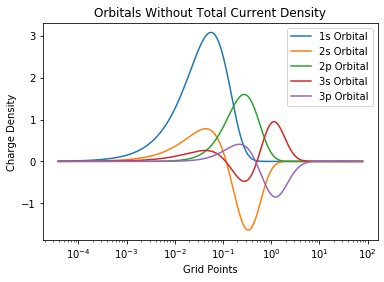

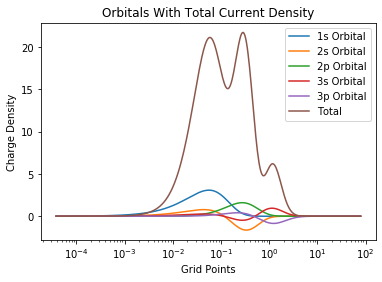

In [9]:
totalDMPData = np.loadtxt("FDA/Ar.dmp", dtype=float, skiprows=3, max_rows=300)

N = np.size(totalDMPData)
gridpoints = totalDMPData[0:N:1, 0]
totalChargeDensity = totalDMPData[0:N:1, 1]


## Results ##
print("3b)")
for i in range(1, 6):
    Data = np.loadtxt("FDA/Ar.dmp", dtype=float, skiprows=(300*i + 3 + i), max_rows=300)
    list=["1s", "2s", "2p", "3s", "3p"]
    plt.figure(1)
    plt.semilogx(gridpoints, Data, label="%s Orbital" %list[i-1])
    plt.figure(2)
    plt.semilogx(gridpoints, Data, label="%s Orbital" %list[i-1])

plt.figure(1)
plt.title("Orbitals Without Total Current Density")
plt.xlabel("Grid Points")
plt.ylabel("Charge Density")
_=plt.legend()


plt.figure(2)    
plt.semilogx(gridpoints, totalChargeDensity, label="Total")
plt.title("Orbitals With Total Current Density")
plt.xlabel("Grid Points")
plt.ylabel("Charge Density")
_=plt.legend()

___
### Question 3c

In [10]:
file = open("FDA/Cd.out", 'r')

totalEnergyLineAtom = []
_1sLine = []
_2sLine = []
_2pLine = []
_3sLine = []
_3pLine = []
_3dLine = []
_4sLine = []
_4pLine = []
_4dLine = []
_5sLine = []
count = 0

while True:
    line = file.readline()
    if not line: break
    if "itr" in line:
        count += 1
    if "total energy" in line:
        totalEnergyLineAtom = line.split()
    if "1s" in line:
        _1sLine = line.split()
    if "2s" in line:
        _2sLine = line.split()
    if "2p" in line:
        _2pLine = line.split()
    if "3s" in line:
        _3sLine = line.split()
    if "3p" in line:
        _3pLine = line.split()
    if "3d" in line:
        _3dLine = line.split()
    if "4s" in line:    
        _4sLine = line.split()
    if "4p" in line:
        _4pLine = line.split()
    if "4d" in line:
        _4dLine = line.split()
    if "5s" in line:
        _5sLine = line.split()
file.close()


## Results ##
print("3c) Cadmium:\n\
    Number of SCF Iterations = %d\n\
    Final HFS Energy = %s Hartrees\n\n\
    Orbital | Energy (Hartrees)\n\
    --------+------------------\n\
       1s   |    %s \n\
       2s   |    %s \n\
       2p   |    %s \n\
       3s   |    %s \n\
       3p   |    %s \n\
       3d   |    %s \n\
       4s   |    %s \n\
       4p   |    %s \n\
       4d   |    %s \n\
       5s   |    %s\n\n\
    The HFS energy is almost 10 times lower in Cd than in Ar;\n\
    which is to be expected, as it is a much larger atom with\n\
    more electrons adding to the atom's stabilization." %(count, totalEnergyLineAtom[3], _1sLine[2], _2sLine[2], 
                                                          _2pLine[2], _3sLine[2], _3pLine[2], _3dLine[2], 
                                                          _4sLine[2], _4pLine[2], _4dLine[2], _5sLine[2]))



3c) Cadmium:
    Number of SCF Iterations = 31
    Final HFS Energy = -5470.9399 Hartrees

    Orbital | Energy (Hartrees)
    --------+------------------
       1s   |    -951.1437 
       2s   |    -139.7159 
       2p   |    -130.6671 
       3s   |    -26.4498 
       3p   |    -22.6988 
       3d   |    -15.7050 
       4s   |    -3.9620 
       4p   |    -2.7342 
       4d   |    -0.7278 
       5s   |    -0.3014

    The HFS energy is almost 10 times lower in Cd than in Ar;
    which is to be expected, as it is a much larger atom with
    more electrons adding to the atom's stabilization.


___
### Question 3d

In [11]:
IE_calc = -float(_5sLine[2])
IE_exp = 8.9938 * 1 / hartree_to_eV

## Results ##
print("3d) The highest energy orbital (i.e. the orbital where the electron\n\
    is taken from) has an energy of %0.3f Hartrees. Compared to the\n\
    experimental value of %0.3f Hartrees, this approximation actually does\n\
    pretty well; the percent difference is only %0.3f%%." %(IE_calc, IE_exp, percent_difference(IE_calc, IE_exp)))

      
## Reference: https://www.lenntech.com/periodic-chart-elements/ionization-energy.htm ##      

3d) The highest energy orbital (i.e. the orbital where the electron
    is taken from) has an energy of 0.301 Hartrees. Compared to the
    experimental value of 0.331 Hartrees, this approximation actually does
    pretty well; the percent difference is only 9.215%.


___
### Question 3e

In [12]:
file = open("FDA/Cd-cation.out", 'r')

totalEnergyLineCation = []
_1sLine = []
_2sLine = []
_2pLine = []
_3sLine = []
_3pLine = []
_3dLine = []
_4sLine = []
_4pLine = []
_4dLine = []
_5sLine = []
count = 0

while True:
    line = file.readline()
    if not line: break
    if "itr" in line:
        count += 1
    if "total energy" in line:
        totalEnergyLineCation = line.split()
    if "1s" in line:
        _1sLine = line.split()
    if "2s" in line:
        _2sLine = line.split()
    if "2p" in line:
        _2pLine = line.split()
    if "3s" in line:
        _3sLine = line.split()
    if "3p" in line:
        _3pLine = line.split()
    if "3d" in line:
        _3dLine = line.split()
    if "4s" in line:    
        _4sLine = line.split()
    if "4p" in line:
        _4pLine = line.split()
    if "4d" in line:
        _4dLine = line.split()
    if "5s" in line:
        _5sLine = line.split()
file.close()


## Results ##
print("3e) Cadmium Cation:\n\
    Number of SCF Iterations = %d\n\
    Final HFS Energy = %s Hartrees\n\n\
    Orbital | Energy (Hartrees)\n\
    --------+------------------\n\
       1s   |    %s \n\
       2s   |    %s \n\
       2p   |    %s \n\
       3s   |    %s \n\
       3p   |    %s \n\
       3d   |    %s \n\
       4s   |    %s \n\
       4p   |    %s \n\
       4d   |    %s \n\
       5s   |    %s\n\n\
    The HFS energy of the atom is lower in energy than that of the\n\
    cation. On the other hand, the orbital energies of the cation are all\n\
    lower in energy than the neutral atom. This is interesting because\n\
    removing one of the paired electrons actually stabilizes the\n\
    individual orbitals. As for the distance from the nucleus, the\n\
    neutral atoms 4s, 4p, 4d, and 5s electrons are farther than those\n\
    of the cation. This can be attributed to a decrease in electron-electron\n\
    repulsion." %(count, totalEnergyLineCation[3], _1sLine[2], _2sLine[2], 
                  _2pLine[2], _3sLine[2], _3pLine[2], _3dLine[2], 
                  _4sLine[2], _4pLine[2], _4dLine[2], _5sLine[2]))




3e) Cadmium Cation:
    Number of SCF Iterations = 31
    Final HFS Energy = -5470.6400 Hartrees

    Orbital | Energy (Hartrees)
    --------+------------------
       1s   |    -951.4902 
       2s   |    -140.0595 
       2p   |    -131.0109 
       3s   |    -26.7941 
       3p   |    -23.0431 
       3d   |    -16.0491 
       4s   |    -4.3076 
       4p   |    -3.0796 
       4d   |    -1.0691 
       5s   |    -0.5910

    The HFS energy of the atom is lower in energy than that of the
    cation. On the other hand, the orbital energies of the cation are all
    lower in energy than the neutral atom. This is interesting because
    removing one of the paired electrons actually stabilizes the
    individual orbitals. As for the distance from the nucleus, the
    neutral atoms 4s, 4p, 4d, and 5s electrons are farther than those
    of the cation. This can be attributed to a decrease in electron-electron
    repulsion.


___
### Question 3f

In [13]:
IE_calc2 = -float(totalEnergyLineAtom[3]) + float(totalEnergyLineCation[3])


## Results ##
print("3f) The highest energy orbital (i.e. the orbital where the electron is\n\
    taken from) has an energy of %0.3f Hartrees. Compared to the experimental\n\
    value of %0.3f Hartrees, this approximation actually does pretty well; the\n\
    percent difference is only %0.3f%%. However, this is not an improvement\n\
    over the method in 3d)." %(IE_calc2, IE_exp, percent_difference(IE_calc2, IE_exp)))

      
## Reference: https://www.lenntech.com/periodic-chart-elements/ionization-energy.htm ##   

3f) The highest energy orbital (i.e. the orbital where the electron is
    taken from) has an energy of 0.300 Hartrees. Compared to the experimental
    value of 0.331 Hartrees, this approximation actually does pretty well; the
    percent difference is only 9.713%. However, this is not an improvement
    over the method in 3d).
